In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime as datet
from datetime import datetime

import matplotlib.dates as mdates
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
import seaborn as sn

from scipy import stats
from scipy.stats import zscore

## Acquisizione del dataset

In [2]:
# Dataset con attributi originali
df3 = pd.read_csv("datatraining.txt")
df1 = pd.read_csv("datatest.txt")
df2 = pd.read_csv("datatest2.txt")

In [3]:
df3.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


In [4]:
df1.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [5]:
df2.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1


In [6]:
df3.isnull().sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

In [7]:
frames = [df1, df3, df2]
df = pd.concat(frames, ignore_index=True)

In [8]:
df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000
mean,20.906212,27.655925,130.756622,690.553276,0.004228,0.231031
std,1.055315,4.982154,210.430875,311.201281,0.000768,0.421503
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,20.200000,24.500000,0.000000,460.000000,0.003719,0.000000
50%,20.700000,27.290000,0.000000,565.416667,0.004292,0.000000
75%,21.525000,31.290000,301.000000,804.666667,0.004832,0.000000
max,24.408333,39.500000,1697.250000,2076.500000,0.006476,1.000000


## Conteggio record Occupancy:
### rispetto a tutto il dataset e in termini di numero di record (numero di minuti)

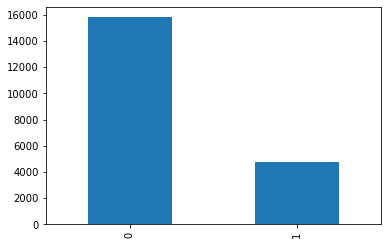

In [9]:
df['Occupancy'].value_counts().plot(kind='bar')
plt.show()

In [10]:
df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000
mean,20.906212,27.655925,130.756622,690.553276,0.004228,0.231031
std,1.055315,4.982154,210.430875,311.201281,0.000768,0.421503
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,20.200000,24.500000,0.000000,460.000000,0.003719,0.000000
50%,20.700000,27.290000,0.000000,565.416667,0.004292,0.000000
75%,21.525000,31.290000,301.000000,804.666667,0.004832,0.000000
max,24.408333,39.500000,1697.250000,2076.500000,0.006476,1.000000


### Copia del dataset per poter dividere le varie parti della data
### aggiungendo "year", "month", "day", "hour", "minute", "second"

In [11]:
# Deep copy
dataset = df.copy(deep=True)
# Convertiamo la data in formato datetime
# "Dataset": è il dataframe con la data divisa in Anno, Mese, Giorno, Ore, Minuti, Secondi
dataset["date"] = pd.to_datetime(dataset["date"])
dataset["year"] = dataset["date"].dt.year
dataset["month"] = dataset["date"].dt.month
dataset["day"] = dataset["date"].dt.day
dataset["hour"] = dataset["date"].dt.hour
dataset["minute"] = dataset["date"].dt.minute
dataset["second"] = dataset["date"].dt.second

## Plot dei grafici

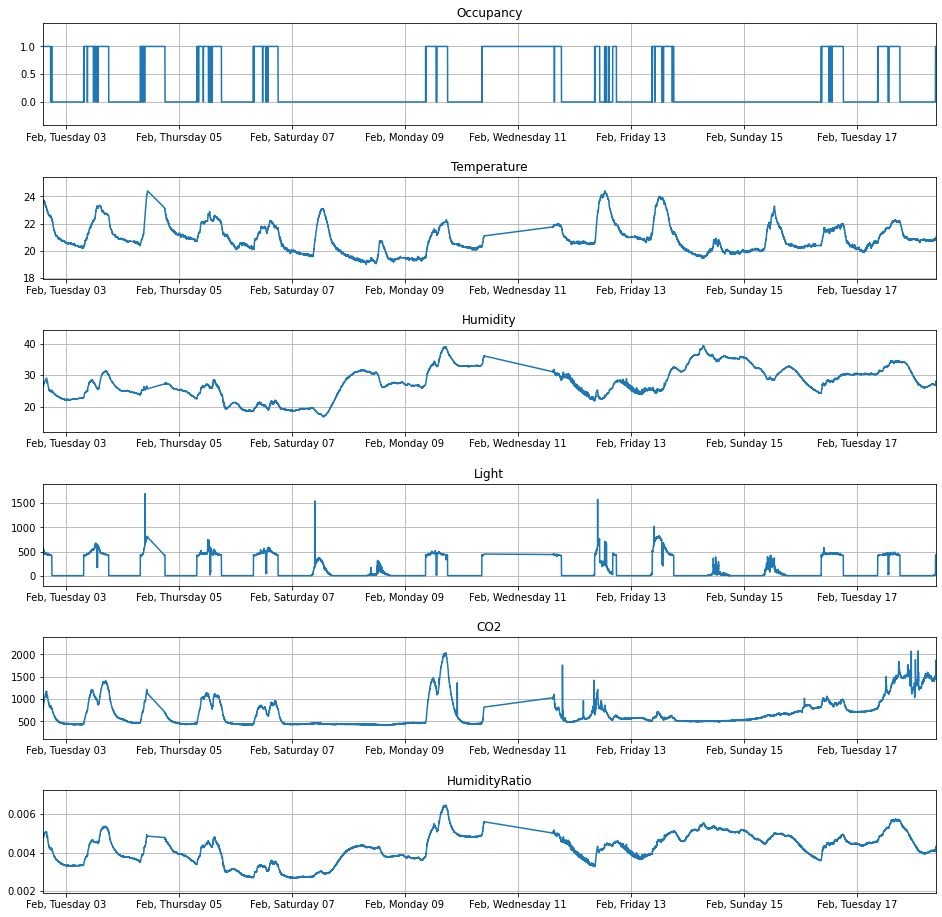

In [12]:
numerical_features = dataset[["Occupancy","Temperature","Humidity","Light","CO2","HumidityRatio"]]
n_numerical_features = len(numerical_features.columns)
numerical_array = numerical_features.columns.values
dim = len(dataset)

# Definisco i 6 subplot
figure, axis = plt.subplots(n_numerical_features, figsize=(16,16))
for i in range(0, n_numerical_features):
    # Data sull'asse delle x
    x = dataset["date"]
    # Features numeriche su ogni y
    y = numerical_features[numerical_array[i]]
    axis[i].plot(x, y)
    # Setto il titolo del plot
    axis[i].set_title(numerical_array[i])
    axis[i].xaxis.set_major_formatter(mdates.DateFormatter('%b, %A %d'))
    # Definiamo il range di plot
    axis[i].set_xlim([min(x), max(x)])
    axis[i].set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    axis[i].grid(True)
plt.subplots_adjust(hspace=0.5)

plt.show()

## Creiamo e inseriamo nel dataset una features per il weekend e una per il weekday

In [13]:
def create_new_features(data):
    weekday = []
    weekend = []

    for index, row in data.iterrows():
        parsed_date = datetime.strptime(row['date'], "%Y-%m-%d %H:%M:%S")
        wday = 0 if parsed_date.isoweekday() > 5 else 1
        wend = 1 if wday==0 else 0
        weekday.append(wday)
        weekend.append(wend)
    return  weekday, weekend

train_weekday, train_weekend = create_new_features(df)

In [14]:
df["Weekday"]= train_weekday
df["Weekend"] = train_weekend

## Creiamo e inseriamo nel dataset 4 nuove features per indicare in che fascia della giornata ci si trova

In [15]:
df["date"][1][11:13]

'14'

In [16]:
Day = []
Afternoon = []
Evening = []
Night = []
for row in df.iterrows():
    if(row[1]["date"][11:13]>="06" and row[1]["date"][11:13]<"12"):
        Day.append(1)
        Afternoon.append(0)
        Evening.append(0)
        Night.append(0)
    elif(row[1]["date"][11:13]>="12" and row[1]["date"][11:13]<"18"):
        Day.append(0)
        Afternoon.append(1)
        Evening.append(0)
        Night.append(0)
    elif(row[1]["date"][11:13]>="18" and row[1]["date"][11:19]< "23:59:59"):
        Day.append(0)
        Afternoon.append(0)
        Evening.append(1)
        Night.append(0)
    else:
        Day.append(0)
        Afternoon.append(0)
        Evening.append(0)
        Night.append(1)
df["Day"] = Day
df["Afternoon"] = Afternoon
df["Evening"] = Evening
df["Night"] = Night

In [17]:
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Weekday,Weekend,Day,Afternoon,Evening,Night
0,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1,1,0,0,1,0,0
1,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1,1,0,0,1,0,0
2,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1,1,0,0,1,0,0
3,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1,1,0,0,1,0,0
4,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1,1,0,0,1,0,0


## Matrice di correlazione del dataset (non considerando Occupancy)
#### Dalla matrice notiamo come Humidity e HumidityRatio sono altamente correlate, quindi l'informazione di una è quasi completamente contenuta nell'altra. Potremmo quindi eliminare ad esempio Humidity (dato che HumidityRatio è un attributo composto)

[Text(0.5, 0, 'Temperature'),
 Text(1.5, 0, 'Humidity'),
 Text(2.5, 0, 'Light'),
 Text(3.5, 0, 'CO2'),
 Text(4.5, 0, 'HumidityRatio')]

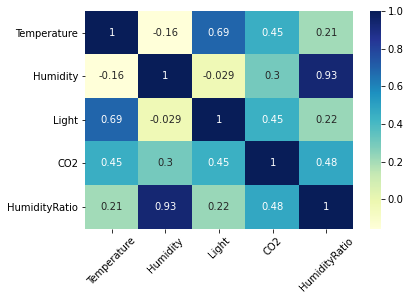

In [18]:
## Nella matrice di correlazione non inseriamo Occupancy essendo un dato binario
# Consideriamo solo gli attributi interessanti (quindi da 1 a 6)
corrMatrix = df[[el for el in df.columns[1:6]]].corr()
h = sn.heatmap(corrMatrix, annot=True, cmap="YlGnBu")
h.set_xticklabels(h.get_xticklabels(), rotation=45)
## Ma senza occupancy come giustifichiamo che luce e Occupancy sono altamente correlate???

## Eliminiamo Humidity dato che è altamente correlata con HumidityRatio, inoltre la seconda è una misura "composta" quindi più informativa della prima

In [19]:
df = df.drop(columns = 'Humidity')

## Pulizia della data
### Siccome mese ed anno è un dato superfluo abbiamo deciso di eliminarlo
### Inoltre, separiamo il giorno dalla fascia oraria, levando l'attributo "date"

In [20]:
#orario =[]
#giorno = []
#for s in df["date"]:
#    orario.append(s[11:])
#    giorno.append(s[8:10])

In [21]:
df = df.drop(columns = 'date')

In [22]:
#d = {'NDay': giorno, 'Time': orario}
#df_temp = pd.DataFrame(data=d)
#df_temp.index = np.arange(1,len(df_temp)+1)
#for attr in df.columns:
#    df_temp[attr] = df[attr]
#df = df_temp

In [23]:
df

,Temperature,Light,CO2,HumidityRatio,Occupancy,Weekday,Weekend,Day,Afternoon,Evening,Night
0,23.7000,585.200000,749.200000,0.004764,1,1,0,0,1,0,0
1,23.7180,578.400000,760.400000,0.004773,1,1,0,0,1,0,0
2,23.7300,572.666667,769.666667,0.004765,1,1,0,0,1,0,0
3,23.7225,493.750000,774.750000,0.004744,1,1,0,0,1,0,0
4,23.7540,488.600000,779.000000,0.004767,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
20555,20.8150,429.750000,1505.250000,0.004213,1,1,0,1,0,0,0
20556,20.8650,423.500000,1514.500000,0.004230,1,1,0,1,0,0,0
20557,20.8900,423.500000,1521.500000,0.004237,1,1,0,1,0,0,0
20558,20.8900,418.750000,1632.000000,0.004279,1,1,0,1,0,0,0


## Ricerca degli Outlier

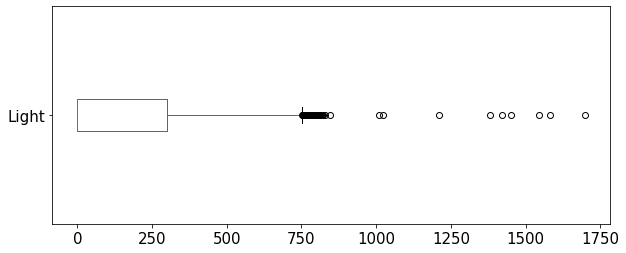

In [24]:
boxplot = df.boxplot(column=['Light'], grid=False, fontsize=15, vert=False, figsize=(10,4))

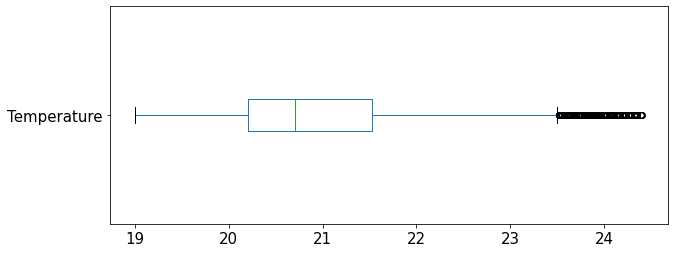

In [25]:
boxplot = df.boxplot(column=['Temperature'], grid=False, fontsize=15, vert=False, figsize=(10,4))

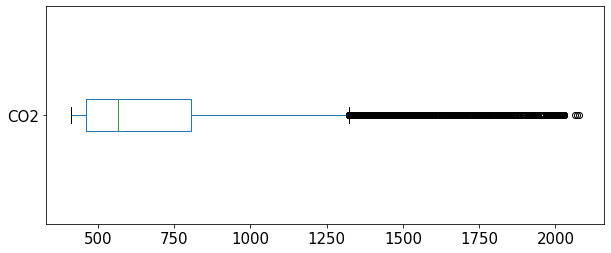

In [26]:
boxplot = df.boxplot(column=['CO2'], grid=False, fontsize=15, vert=False, figsize=(10,4))

In [27]:
## Troviamo la posizione dei 3 valori e il loro valore
count = 0
it = 0
for v in df["CO2"]:
    if v >= 2055:
        count = count + 1
        print("Indice: " + str(it) + " Valore: " + str(v))
    it = it + 1

Indice: 19936 Valore: 2072.0
Indice: 20109 Valore: 2065.75
Indice: 20111 Valore: 2076.5


In [28]:
df["CO2"][0]

749.2

In [29]:
# Definizione della media mobile =>>> CONTROLLARE SE GIUSTA!!
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

In [30]:
co2_media =moving_average(df["CO2"], 3)
print(co2_media[19936])
print(co2_media[20109])
print(co2_media[20111])
df["CO2"][19936] = co2_media[19936]
df["CO2"][20109] = co2_media[20109]
df["CO2"][20111] = co2_media[20111]

1724.8888888888898
1960.4166666666667
1881.0555555555566


<ipython-input-30-54bacf8712f1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CO2"][19936] = co2_media[19936]
<ipython-input-30-54bacf8712f1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CO2"][20109] = co2_media[20109]
<ipython-input-30-54bacf8712f1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CO2"][20111] = co2_media[20111]


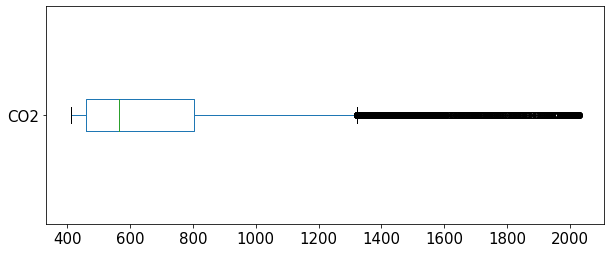

In [31]:
boxplot = df.boxplot(column=['CO2'], grid=False, fontsize=15, vert=False, figsize=(10,4))

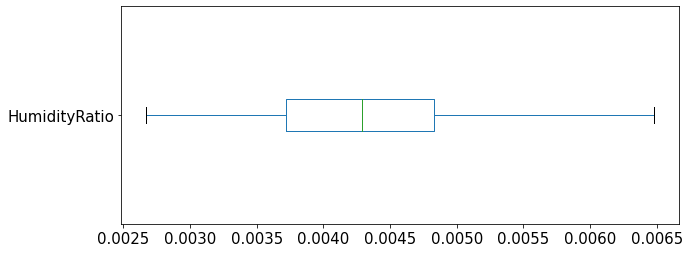

In [32]:
boxplot = df.boxplot(column=['HumidityRatio'], grid=False, fontsize=15, vert=False, figsize=(10,4))

## Sostituiamo i 3 valori di Light definiti come "outlier" con una media mobile di 4 minuti
### Mentre usandola a 3 minuti otteniamo un valore pari a 0.54 che è comunque un outlier

In [33]:
## Troviamo la posizione dei 3 valori e il loro valore
count = 0
it = 0
lis = []
for v in df["Light"]:
    if v >= 1000:
        lis.append(it)
        print("Indice: " + str(it) + " Valore: " + str(v))
    it = it + 1

Indice: 2601 Valore: 1419.5
Indice: 2602 Valore: 1697.25
Indice: 2603 Valore: 1209.8
Indice: 6496 Valore: 1546.33333333333
Indice: 6497 Valore: 1451.75
Indice: 11946 Valore: 1380.0
Indice: 11947 Valore: 1581.0
Indice: 11948 Valore: 1010.5
Indice: 13389 Valore: 1021.25


In [34]:
lis

[2601, 2602, 2603, 6496, 6497, 11946, 11947, 11948, 13389]

In [35]:
df["Light"][2601]

1419.5

In [36]:
light_media =moving_average(df["Light"], 8)
it = 0
for v in df["Light"]:
    if v >= 1000:
        print(str(light_media[it]) + " " + str(v))
        print(it)
        df["Light"][it] = light_media[it]
        print(df["Light"][it])
    it = it + 1

968.93125 1419.5
2601
968.93125
878.21875 1697.25
2602
878.21875
752.1875000000001 1209.8
2603
752.1875000000001
616.7812499999997 1546.33333333333
6496
616.7812499999997
450.86458333333337 1451.75
6497
450.86458333333337
912.65625 1380.0
11946
912.65625
818.71875 1581.0
11947
818.71875
700.21875 1010.5
11948
700.21875
771.0 1021.25
13389
771.0


<ipython-input-36-f8eeb35d26ec>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Light"][it] = light_media[it]


## Rifacciamo il grafico degli Outlier per vedere che sia tutto apposto :D

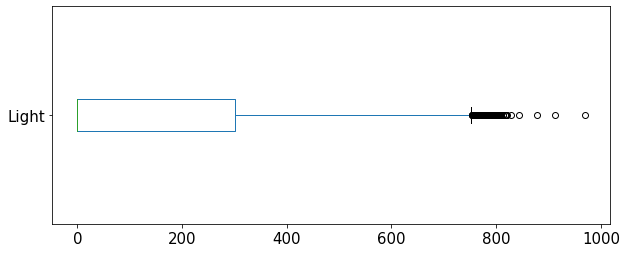

In [37]:
boxplot = df.boxplot(column=['Light'], grid=False, fontsize=15, vert=False, figsize=(10,4))

# Normalizziamo
## Usiamo "minmax" e chiamiamo il dataset "normalize_df"

In [38]:
x = df.drop(columns=['Occupancy','Weekday', 'Weekend', 'Day', 'Afternoon', 'Evening','Night'])
val = x.values
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
minmax_df = pd.DataFrame(x_scaled, columns = ['Temperature', 'Light','CO2','HumidityRatio'])

In [39]:
minmax_df.describe()

,Temperature,Light,CO2,HumidityRatio
count,20560.000000,20560.000000,20560.000000,20560.000000
mean,0.352458,0.134676,0.171915,0.408794
std,0.195127,0.215928,0.192526,0.201971
min,0.000000,0.000000,0.000000,0.000000
25%,0.221880,0.000000,0.029243,0.274836
50%,0.314330,0.000000,0.094487,0.425517
75%,0.466872,0.310652,0.242560,0.567518
max,1.000000,1.000000,1.000000,1.000000


In [52]:
x = df.drop(columns=['Occupancy','Weekday', 'Weekend', 'Day', 'Afternoon', 'Evening','Night'])
f_zscore = (x - x.mean())/x.std()

In [54]:
f_zscore.describe()

,Temperature,Light,CO2,HumidityRatio
count,2.056000e+04,2.056000e+04,2.056000e+04,2.056000e+04
mean,-1.307595e-12,-4.340670e-16,-4.644793e-16,-6.375531e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.806298e+00,-6.237083e-01,-8.929426e-01,-2.024026e+00
25%,-6.691960e-01,-6.237083e-01,-7.410498e-01,-6.632544e-01
50%,-1.954036e-01,-6.237083e-01,-4.021707e-01,8.280122e-02
75%,5.863538e-01,8.149753e-01,3.669374e-01,7.858781e-01
max,3.318557e+00,4.007473e+00,4.301149e+00,2.927191e+00


In [41]:
# Dataset con la normalizzato
normalize_df = df.copy(deep=True)

In [42]:
minmax_df.index = np.arange(0,len(df))
for attr in minmax_df.columns:
    normalize_df[attr] = minmax_df[attr]

In [43]:
normalize_df["Light"].describe()

count    20560.000000
mean         0.134676
std          0.215928
min          0.000000
25%          0.000000
50%          0.000000
75%          0.310652
max          1.000000
Name: Light, dtype: float64

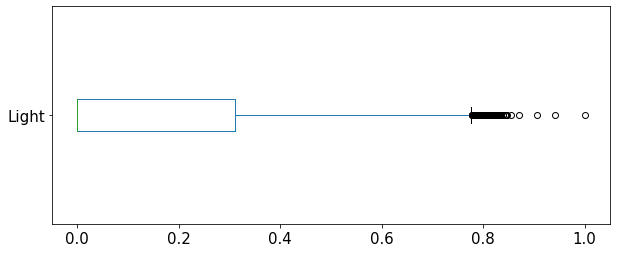

In [44]:
boxplot = normalize_df.boxplot(column=['Light'], grid=False, fontsize=15, vert=False, figsize=(10,4))

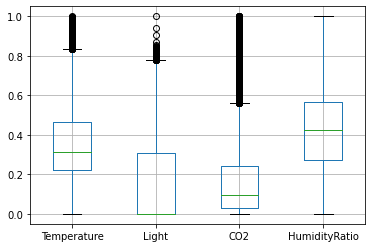

In [45]:
attribute = ["Temperature", "Light", "CO2", "HumidityRatio"]
normalize_df[attribute].boxplot()

c:\users\matte\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


RuntimeError: Selected KDE bandwidth is 0. Cannot estimate density.

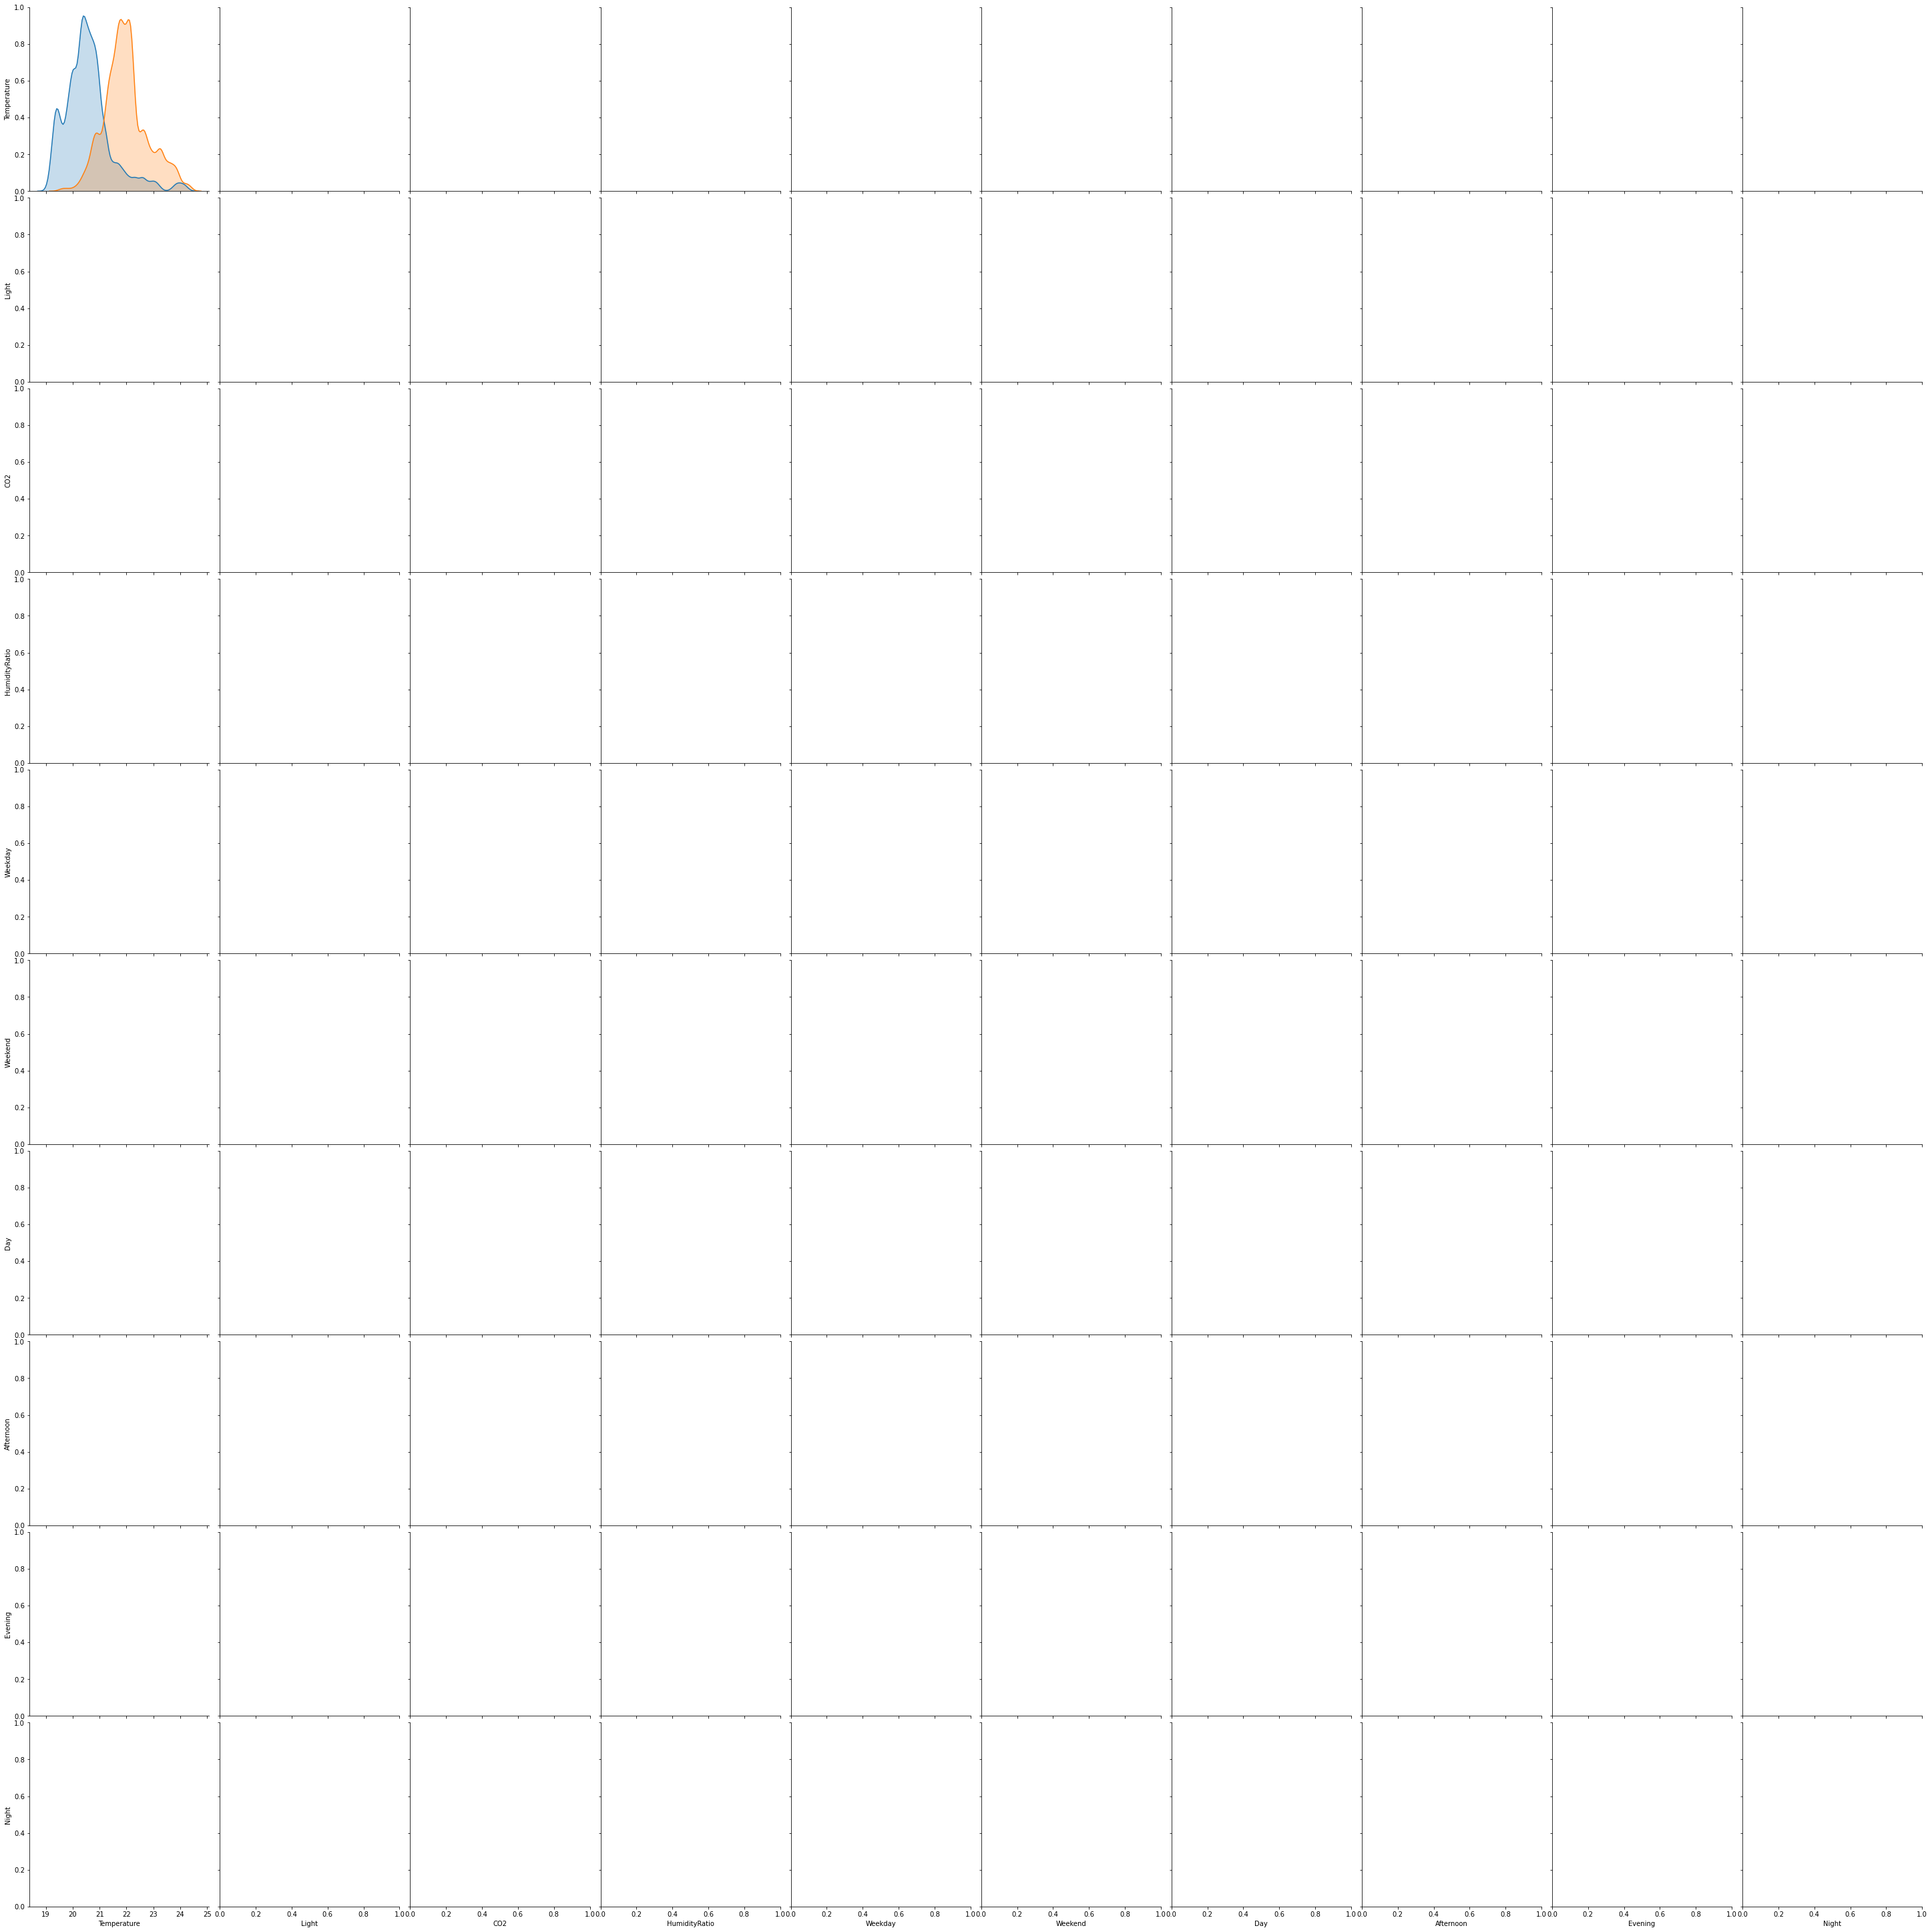

In [46]:
sn.pairplot(df, hue = 'Occupancy', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)

# Plotto l'Occupancy ogni ora nei vari giorni
### utilizzo un dataset di appoggio

In [ ]:
# Deep copy
#dataset_tmp = normalize_df.copy(deep=True)
# Convertiamo la data in formato datetime
# "Dataset": è il dataframe con la data divisa in Ore, Minuti, Secondi
#dataset_tmp["Time"] = pd.to_datetime(dataset_tmp["Time"])
#dataset_tmp["hour"] = dataset_tmp["Time"].dt.hour
#dataset_tmp["minute"] = dataset_tmp["Time"].dt.minute
#dataset_tmp["second"] = dataset_tmp["Time"].dt.second

In [ ]:
# Elenco dei giorni
#l = normalize_df["NDay"].unique()

In [ ]:
#for d in l:
#    f = plt.figure(figsize=(30,5))
    # Plotto il grafico
#    plt.xticks(np.arange(0, len(dataset_tmp[dataset_tmp["NDay"]==d]), step=1),rotation=50)
#    x = dataset_tmp[dataset_tmp["NDay"]==d]["hour"]
#    y = dataset_tmp[dataset_tmp["NDay"]==d]["Light"]
#    plt.plot(x,y, label = "Occupacy Distribution in Time Slot")
#    plt.legend()
'''    plt.grid()
    plt.show()
    '''


## Grafico a Torta che indica la distribuzione dei valori di Occupancy nelle varie fasce 

In [ ]:
ax1=df.groupby(["Day", "Afternoon", "Evening", "Night"])["Occupancy"].value_counts()
print(ax1)
day0, day1 = ax1[1]
aft0, aft1 = ax1[0][1]
eve0, eve1 = ax1[0][0][1]
nig0 = ax1[0][0][0][1][0]
data = np.array([day1, day0, nig0, eve1, eve0,aft1, aft0])
s = pd.Series(data, index=[ "(Day, 1)", "(Day, 0)", "(Night, 0)", "(Evening, 1)", "(Evening, 0)", "(Afternoon, 1)","(Afternoon, 0)"])
print(s)

In [ ]:
size=0.3
plt.figure(figsize=(10,6))
# plot chart
                                #Day1        #Day0     #Night   #Evening1  #Evening0  #Afternoon1 #Afternoo0
ax = s.plot(kind='pie', colors = ['#4d996a', '#327d40','#6e4d99','#4d5699','#323b7d','#4d9998', '#327d7c'],fontsize =11, radius=1-size,
        wedgeprops=dict(width=size, edgecolor='w'),  startangle=0)
        
plt.title("Occupancy Distribution",fontsize=15)
# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  
plt.ylabel('')
plt.show()

In [ ]:
size=0.3
plt.figure(figsize=(10,6))
# plot chart
                                #Day1        #Day0     #Night   #Evening1  #Evening0  #Afternoon1 #Afternoo0
ax = s.plot(kind='pie',  autopct = '%1.1f%%', colors = ['#4d996a', '#327d40','#6e4d99','#4d5699','#323b7d','#4d9998', '#327d7c'],fontsize =11, radius=1-size,
        wedgeprops=dict(width=0.4, edgecolor='w'),  startangle=0)
        
plt.title("Occupancy Distribution",fontsize=15)
# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  
plt.ylabel('')
plt.show()

In [ ]:
from pandas.tools.plotting import table
raw_data = {'Time Slot': ['Day', 'Afternoon', 'Evening', 'Night'],
        'Occupancy = 0': [day0, aft0, eve0, nig0],
        'Occupancy = 1': [day1, aft1, eve1, 0]}
df = pd.DataFrame(raw_data, columns = ['Time Slot', 'Occupancy = 0', 'Occupancy = 1'])
df['Total Occupancy'] = df['Occupancy = 0'] + df['Occupancy = 1']
plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
df.plot(kind='pie', y = 'Total Occupancy', ax=ax1, autopct='%1.1f%%', 
 startangle=0, shadow=False, labels=df['Time Slot'], legend = False, fontsize=14,  wedgeprops=dict(width=0.6, edgecolor='w'))

# plot table
ax2 = plt.subplot(122)
plt.axis('off')
tbl = table(ax2, df, loc='center')
tbl.auto_set_font_size(True)
tbl.set_fontsize(14)
plt.show()

In [ ]:
normalize_df.head()

In [297]:
normalize_df = normalize_df[['Temperature', 'Light', 'CO2', 'HumidityRatio', 'Day', 'Afternoon', 'Evening', 'Night', 'Weekday', 'Weekend', 'Occupancy']]

In [298]:
normalize_df.head()

,Temperature,Light,CO2,HumidityRatio,Day,Afternoon,Evening,Night,Weekday,Weekend,Occupancy
0,0.869029,0.603964,0.208231,0.549737,0,1,0,0,1,0,1
1,0.872357,0.596946,0.215163,0.551972,0,1,0,0,1,0,1
2,0.874576,0.591029,0.220898,0.549997,0,1,0,0,1,0,1
3,0.873190,0.509582,0.224045,0.544374,0,1,0,0,1,0,1
4,0.879014,0.504267,0.226675,0.550376,0,1,0,0,1,0,1


In [299]:
normalize_df.to_csv(r'dataset_All_normalized.csv', index = False)

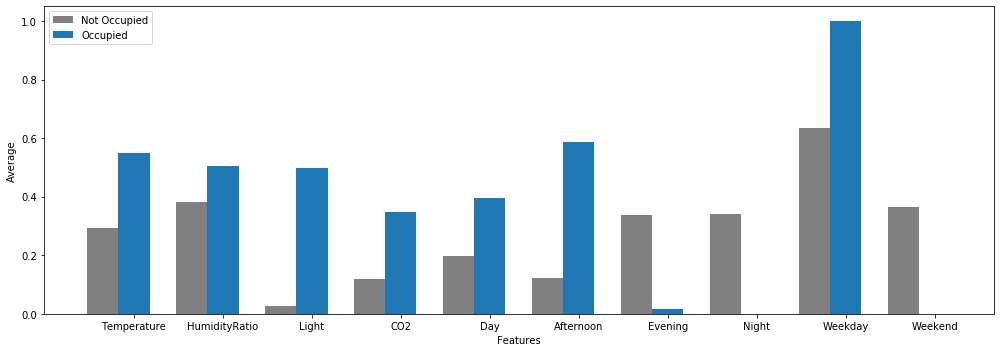

In [92]:


summary_occupancy = normalize_df[["Temperature","Light","CO2","HumidityRatio", "Day", "Afternoon", "Evening", "Night", "Weekday", "Weekend","Occupancy"]].\
        groupby(["Occupancy"],as_index = False).mean()
    
n_groups = 10
fig, ax = plt.subplots(figsize = (14,5))
index = np.arange(n_groups)
bar_width = 0.35
    
rects_no = plt.bar(index,np.asarray(summary_occupancy[["Temperature","HumidityRatio","Light","CO2", "Day", "Afternoon", "Evening", "Night", "Weekday", "Weekend",]])[0], 
                 bar_width,
                 color="grey",
                 label="Not Occupied")
 
    
rects_o = plt.bar(index + bar_width,np.asarray(summary_occupancy[["Temperature","HumidityRatio","Light","CO2", "Day", "Afternoon", "Evening", "Night", "Weekday", "Weekend",]])[1], 
                 bar_width,
                 label="Occupied")

plt.xlabel("Features")
plt.ylabel("Average")
plt.xticks(index + bar_width, ("Temperature", "HumidityRatio","Light", "CO2", "Day", "Afternoon", "Evening", "Night", "Weekday", "Weekend",)) 
plt.legend(loc = "upper left")
 
plt.tight_layout()
plt.show()

In [114]:
normalize_df.shape

(20560, 11)

In [117]:
shallow = df.copy(deep=True)
shallow = shallow.drop(columns = ['Day', 'Evening', 'Night', 'Afternoon', 'Weekday', 'Weekend'])

In [118]:
shallow.shape

(20560, 5)